In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
import random
from fbprophet import Prophet

In [6]:
Dataset = pd.read_csv('avocado.csv')

In [7]:
Dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
Dataset.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [9]:
 Dataset = Dataset.sort_values('Date')

In [10]:
Dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
2807,51,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico
1195,51,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,organic,2015,LasVegas
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
1143,51,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015,LasVegas


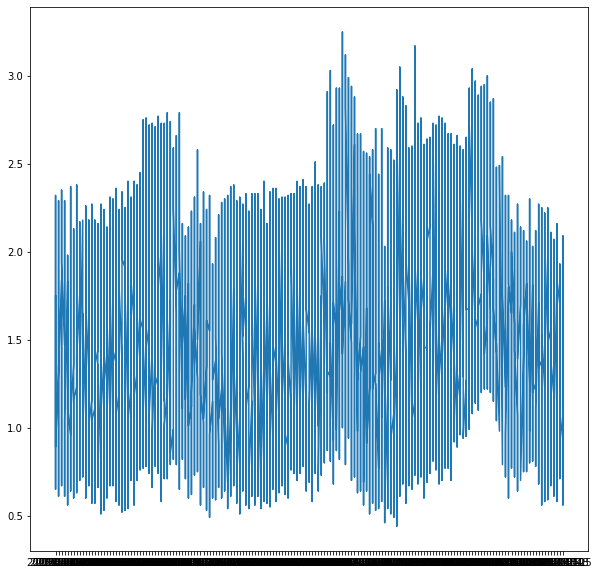

In [12]:
plt.figure(figsize=(10,10))
plt.plot(Dataset['Date'], Dataset['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

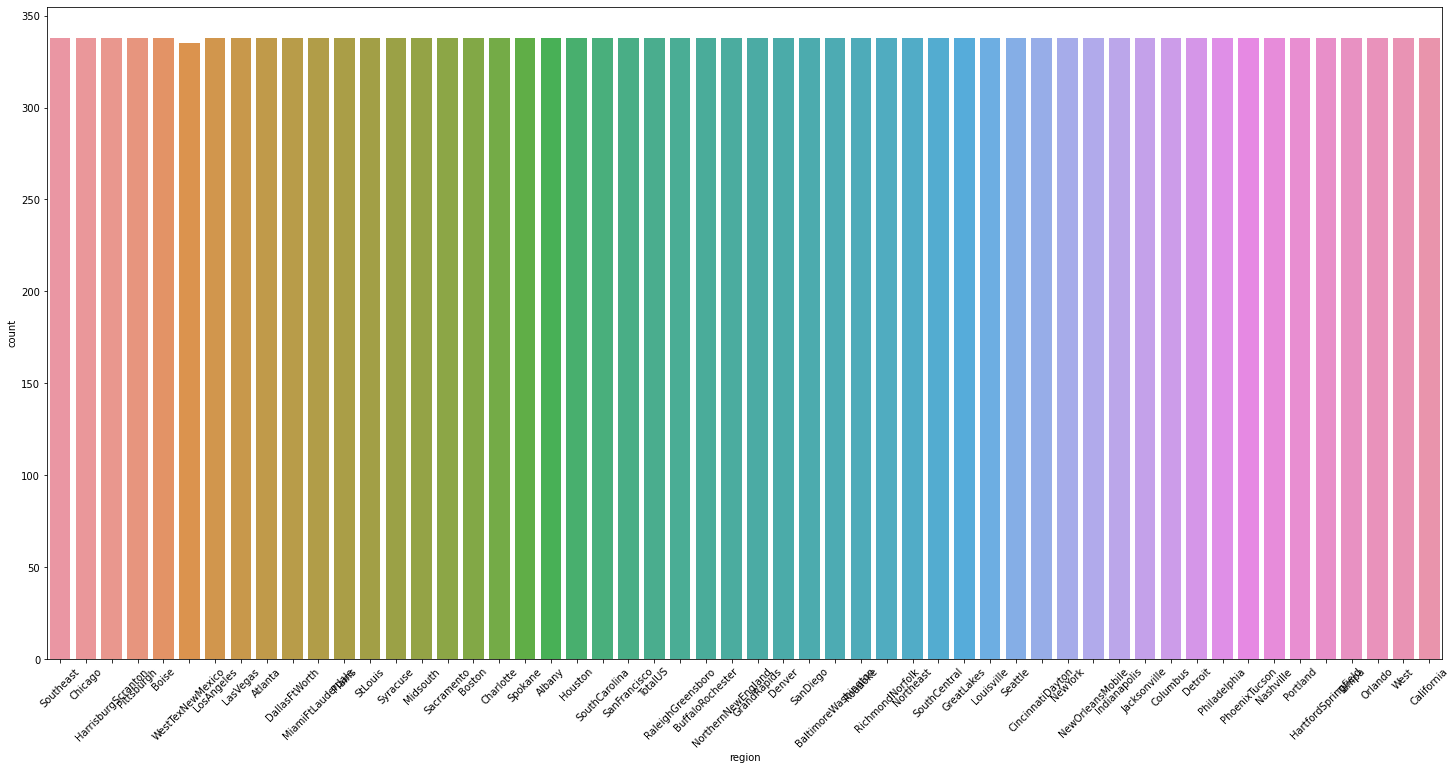

In [16]:
plt.figure(figsize=(25,12))
sb.countplot(x = 'region', data = Dataset)
plt.xticks(rotation = 45)

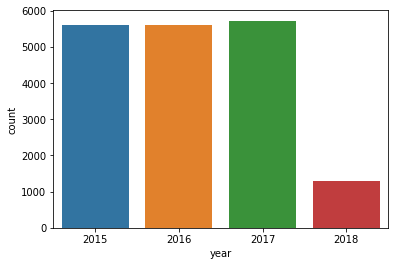

In [17]:
sb.countplot(x = 'year', data = Dataset)

In [18]:
Dataset_prophet = Dataset[['Date','AveragePrice']]

In [19]:
Dataset_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
2807,2015-01-04,0.75
1195,2015-01-04,0.85
10269,2015-01-04,1.50
103,2015-01-04,1.00
1143,2015-01-04,0.80


In [24]:
Dataset_prophet = Dataset_prophet.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

In [25]:
Dataset_prophet

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
2807,2015-01-04,0.75
1195,2015-01-04,0.85
10269,2015-01-04,1.50
103,2015-01-04,1.00
1143,2015-01-04,0.80


In [26]:
m = Prophet()
m.fit(Dataset_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future  = m.make_future_dataframe(periods=365)
forecast  = m.predict(future)

In [30]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498604,0.919670,1.871093,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
1,2015-01-04,1.498604,0.890205,1.855644,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
2,2015-01-04,1.498604,0.902703,1.858565,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
3,2015-01-04,1.498604,0.893047,1.886493,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
4,2015-01-04,1.498604,0.917307,1.845007,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
5,2015-01-04,1.498604,0.878645,1.854641,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
6,2015-01-04,1.498604,0.923837,1.876462,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
7,2015-01-04,1.498604,0.912650,1.863359,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
8,2015-01-04,1.498604,0.854534,1.867788,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
9,2015-01-04,1.498604,0.894137,1.865657,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119


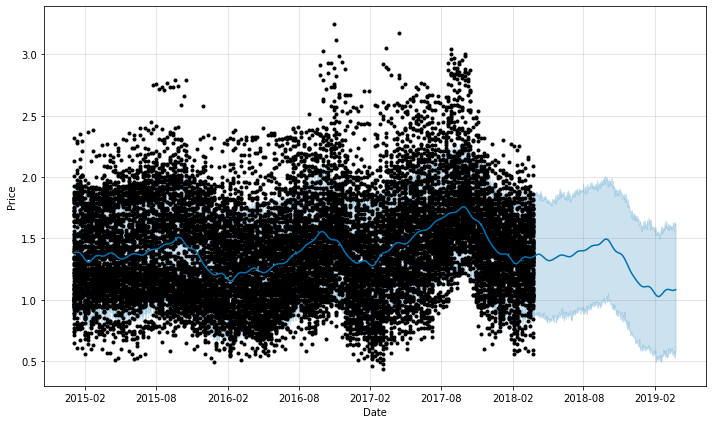

In [31]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

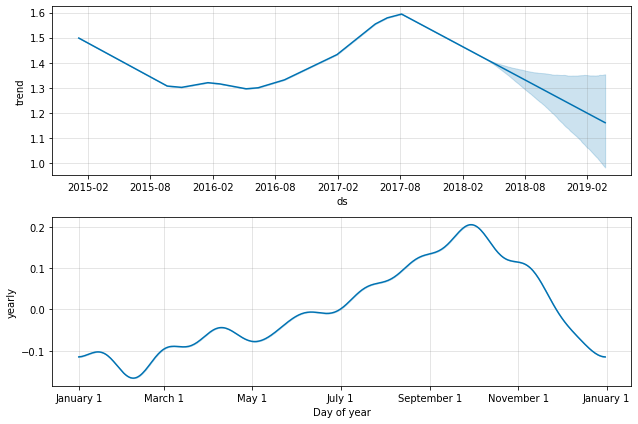

In [32]:
fiqure = m.plot_components(forecast)

In [51]:
avocado_df = pd.read_csv('avocado.csv')

In [52]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


In [55]:
avocado_sample_df  =  avocado_df[  avocado_df['region']=='West'  ]

In [56]:
avocado_sample_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West
2709,5,2015-11-22,0.92,4481990.34,1549012.12,1588339.47,118170.98,1226467.77,730580.48,494585.14,1302.15,conventional,2015,West
2710,6,2015-11-15,0.83,5972493.77,1996852.58,2060439.93,122763.34,1792437.92,1080985.70,699956.70,11495.52,conventional,2015,West
2711,7,2015-11-08,0.88,5094837.54,2204338.57,1668416.99,107753.58,1114328.40,770544.02,341544.79,2239.59,conventional,2015,West
2712,8,2015-11-01,0.90,5024858.14,1815066.15,1937479.91,132883.59,1139428.49,717110.41,421675.08,643.00,conventional,2015,West
2713,9,2015-10-25,0.95,4945835.54,1574344.01,1990844.80,134572.92,1246073.81,823727.52,420764.79,1581.50,conventional,2015,West


In [57]:
avocado_sample_df = avocado_sample_df.sort_values('Date')

In [58]:
avocado_sample_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
11879,49,2015-01-18,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,organic,2015,West
2752,48,2015-01-25,0.94,5461313.90,2695157.56,2031937.97,71550.57,662667.80,521877.70,140735.66,54.44,conventional,2015,West
11878,48,2015-01-25,1.52,166494.38,61454.35,68624.86,749.30,35665.87,9756.03,25909.84,0.00,organic,2015,West
2751,47,2015-02-01,0.84,8362504.08,3531350.44,3872672.00,80893.53,877588.11,705333.64,172154.91,99.56,conventional,2015,West
11877,47,2015-02-01,1.34,216484.22,89599.59,82183.07,184.99,44516.57,11083.16,33433.41,0.00,organic,2015,West


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


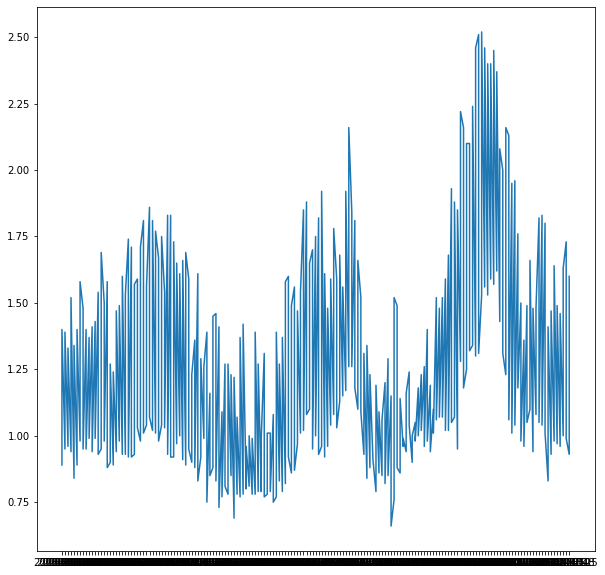

In [61]:
plt.figure(figsize= (10,10))
plt.plot(avocado_sample_df['Date'], avocado_sample_df['AveragePrice'])

In [62]:
avocado_sample_df = avocado_sample_df.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

In [63]:
avocado_sample_df

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
11879,49,2015-01-18,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,organic,2015,West
2752,48,2015-01-25,0.94,5461313.90,2695157.56,2031937.97,71550.57,662667.80,521877.70,140735.66,54.44,conventional,2015,West
11878,48,2015-01-25,1.52,166494.38,61454.35,68624.86,749.30,35665.87,9756.03,25909.84,0.00,organic,2015,West
2751,47,2015-02-01,0.84,8362504.08,3531350.44,3872672.00,80893.53,877588.11,705333.64,172154.91,99.56,conventional,2015,West
11877,47,2015-02-01,1.34,216484.22,89599.59,82183.07,184.99,44516.57,11083.16,33433.41,0.00,organic,2015,West


In [68]:
m = Prophet()
m.fit(avocado_sample_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [69]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

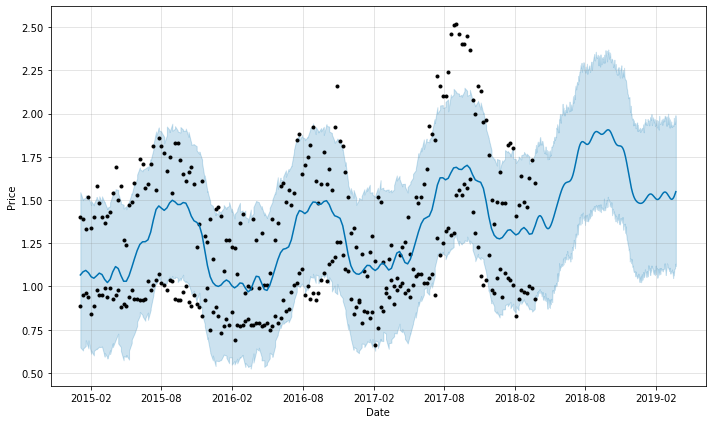

In [70]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

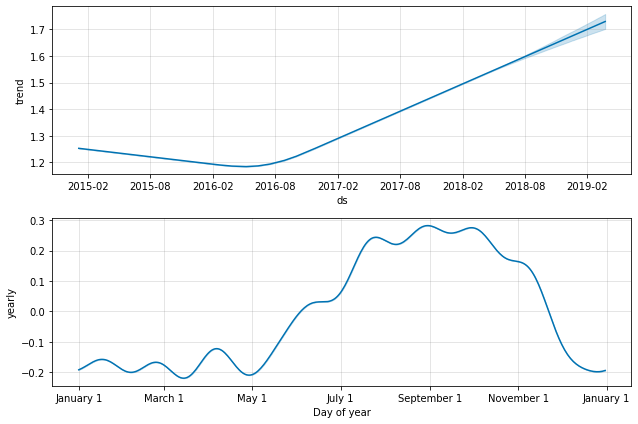

In [71]:
figure = m.plot_components(forecast)